In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

from resemblyzer import VoiceEncoder, preprocess_wav
from pathlib import Path
import numpy as np

In [3]:
dvec_path = "/home/ytang363/7100_voiceConversion/VCTK-Corpus-0.92/spmel-16k-split/train/train.pkl"
xvec_path = "/home/ytang363/7100_voiceConversion/VCTK-Corpus-0.92/spmel-16k-split/train/train_xvec.pkl"
res_path = "/home/ytang363/7100_voiceConversion/VCTK-Corpus-0.92/spmel-16k-split/train/train_res.pkl"

dvec = pickle.load(open(dvec_path, "rb"))
xvec = pickle.load(open(xvec_path, "rb"))
res = pickle.load(open(res_path, "rb"))

In [4]:
def extract(vec, projection=True):
    m, n = len(vec), vec[0][1].shape[0]

    if projection:
        n = 256
        projection = True
        proj = nn.Linear(512, 256)

    combine_vec = np.zeros((m,n))
    for i in range(len(vec)):
        cur = vec[i][1]

        if projection:
            cur = torch.from_numpy(cur)
            xvec_projected = proj(cur)
            scaled = nn.functional.normalize(xvec_projected, dim=0)
            cur = scaled.detach().numpy()
            
        combine_vec[i] = cur.T
    return combine_vec

In [5]:
dvec_combine = extract(dvec, projection=False)
dvec_mean = np.mean(dvec_combine)
dvec_std = np.std(dvec_combine)
dvec_mean, dvec_std, np.max(dvec_combine), np.min(dvec_combine)

(0.0005129863338735577,
 0.050801321223977285,
 0.19126957654953003,
 -0.20705685019493103)

In [6]:
xvec_combine = extract(xvec, projection=False)
xvec_mean = np.mean(xvec_combine)
xvec_std = np.std(xvec_combine)
xvec_mean, xvec_std, np.max(xvec_combine), np.min(xvec_combine)

(-0.2246775514580502,
 12.674782262071727,
 38.361026763916016,
 -42.30704879760742)

In [15]:
res_combine = extract(res, projection=False)
res_mean = np.mean(res_combine)
res_std = np.std(res_combine)
res_mean, xvec_std, np.max(res_combine), np.min(res_combine)

(0.03222479969444211, 12.674782262071727, 0.30179014801979065, 0.0)

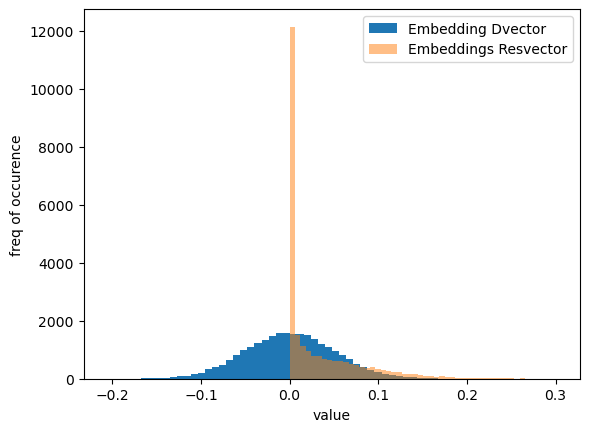

In [17]:
plt.hist(dvec_combine.flatten(), bins=50, alpha=1, label='Embedding Dvector')
# plt.hist(xvec_combine.flatten(), bins=50, alpha=0.3, label='Embeddings Xvector')
plt.hist(res_combine.flatten(), bins=50, alpha=0.5, label='Embeddings Resvector')
plt.xlabel('value')
plt.ylabel('freq of occurence')
plt.legend()
plt.show()

0.0017669002737094456 0.06247501928595415 0.1990901678800583 -0.2010226994752884


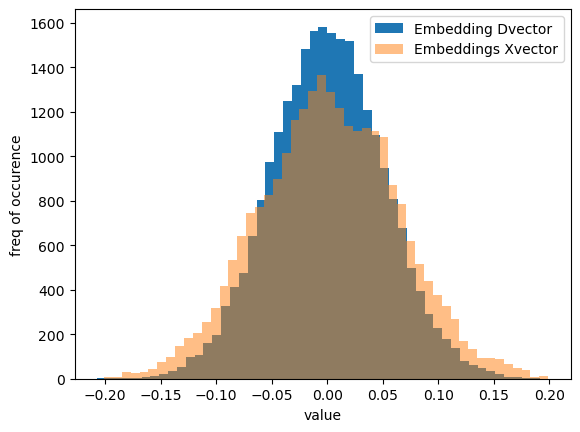

In [31]:
xvec_combine = extract(xvec, projection=True)
xvec_mean = np.mean(xvec_combine)
xvec_std = np.std(xvec_combine)
print(xvec_mean, xvec_std, np.max(xvec_combine), np.min(xvec_combine))

plt.hist(dvec_combine.flatten(), bins=50, alpha=1, label='Embedding Dvector')
plt.hist(xvec_combine.flatten(), bins=50, alpha=0.5, label='Embeddings Xvector')
plt.xlabel('value')
plt.ylabel('freq of occurence')
plt.legend()
plt.show()